### Librerie

In [17]:
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import confusion_matrix
import seaborn as sns 
from scipy import stats
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Preparazione dei dati

In [18]:
accuracy_ab = 0.66
precision_ab = 0.65
recall_ab = 0.76
f1_score_ab = 0.7
roc_auc_ab = 0.66

"""
accuracy_gnb = 0.7669
precision_gnb = 0.9429
recall_gnb = 0.6600
f1_score_gnb = 0.7765
roc_auc_gnb = 0.7983
"""

accuracy_gb = 0.66
precision_gb = 0.625
recall_gb = 0.88
f1_score_gb = 0.73
roc_auc_gb = 0.66

accuracy_lr = 0.6
precision_lr = 0.61
recall_lr = 0.64
f1_score_lr = 0.62
roc_auc_lr = 0.6

accuracy_mnb = 0.72
precision_mnb = 0.83
recall_mnb = 0.58
f1_score_mnb = 0.68
roc_auc_mnb = 0.73

accuracy_opls = 0.865
precision_opls = 0.8824
recall_opls = 0.9
f1_score_opls = 0.8911
roc_auc_opls = 0.8548

accuracy_pls = 0.6
precision_pls = 0.62
recall_pls = 0.58
f1_score_pls = 0.6
roc_auc_pls = 0.6

accuracy_rf = 0.64
precision_rf = 0.73
recall_rf = 0.63
f1_score_rf = 0.68
roc_auc_rf = 0.65

accuracy_svm = 0.48
precision_svm = 0.5
recall_svm = 0.94
f1_score_svm = 0.63
roc_auc_svm = 0.47

accuracy_xgb = 0.66
precision_xgb = 0.63
recall_xgb = 0.82
f1_score_xgb = 0.71
roc_auc_xgb = 0.66

data = {
    'AdaBoost': [accuracy_ab, precision_ab, recall_ab, f1_score_ab, roc_auc_ab],
    'Gradient Boosting': [accuracy_gb, precision_gb, recall_gb, f1_score_gb, roc_auc_gb],
    'Logistic Regression': [accuracy_lr, precision_lr, recall_lr, f1_score_lr, roc_auc_lr],
    'Multinomial NB': [accuracy_mnb, precision_mnb, recall_mnb, f1_score_mnb, roc_auc_mnb],
    # 'Orthogonal Partial Least Squares': [accuracy_opls, precision_opls, recall_opls, f1_score_opls, roc_auc_opls],
    'Partial Least Squares': [accuracy_pls, precision_pls, recall_pls, f1_score_pls, roc_auc_pls],
    'Random Forest': [accuracy_rf, precision_rf, recall_rf, f1_score_rf, roc_auc_rf],
    'Support Vector Machine': [accuracy_svm, precision_svm, recall_svm, f1_score_svm, roc_auc_svm],
    'XGBoost': [accuracy_xgb, precision_xgb, recall_xgb, f1_score_xgb, roc_auc_xgb],
}

df = pd.DataFrame(data, index=['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC'])

In [19]:
print(df)

           AdaBoost  Gradient Boosting  Logistic Regression  Multinomial NB  \
Accuracy       0.66              0.660                 0.60            0.72   
Precision      0.65              0.625                 0.61            0.83   
Recall         0.76              0.880                 0.64            0.58   
F1-score       0.70              0.730                 0.62            0.68   
ROC AUC        0.66              0.660                 0.60            0.73   

           Partial Least Squares  Random Forest  Support Vector Machine  \
Accuracy                    0.60           0.64                    0.48   
Precision                   0.62           0.73                    0.50   
Recall                      0.58           0.63                    0.94   
F1-score                    0.60           0.68                    0.63   
ROC AUC                     0.60           0.65                    0.47   

           XGBoost  
Accuracy      0.66  
Precision     0.63  
Recall     

### Performance dei modelli sul dataset ST000369

Per ciascuna metrica illustriamo i modelli di apprendimento automatico con la metrica migliore.

In [20]:
best_algorithms = df.idxmax(axis=1)

# Stampa i risultati
print("Algoritmo migliore per ciascuna metrica:")
for metric, algorithm in best_algorithms.items():
    print(f"{metric}: {algorithm} ({df[algorithm][metric]})")

Algoritmo migliore per ciascuna metrica:
Accuracy: Multinomial NB (0.72)
Precision: Multinomial NB (0.83)
Recall: Support Vector Machine (0.94)
F1-score: Gradient Boosting (0.73)
ROC AUC: Multinomial NB (0.73)


Adesso visualizziamo le performance dei vari modelli.

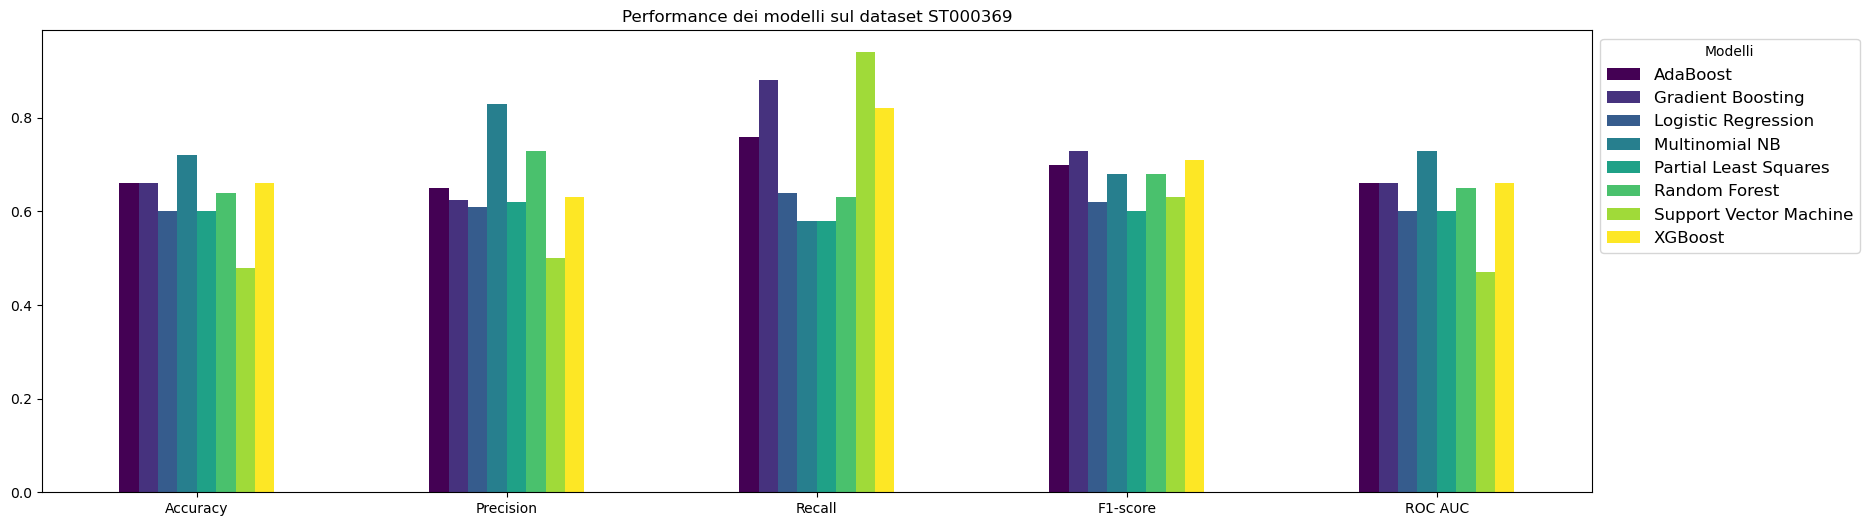

In [21]:
df.plot(kind='bar', rot=0, figsize=(20, 6), colormap='viridis')
plt.title('Performance dei modelli sul dataset ST000369')
plt.legend(title='Modelli', bbox_to_anchor=(1, 1), loc='upper left', fontsize='large')

plt.show()

In [22]:
fig = px.bar(df.T, barmode='group',
             labels={'value': 'Valore', 'variable': 'Metrica', 'index': 'Modello',},
             width=800, height=500)

fig.update_layout(showlegend=True, legend_title='Metriche', legend=dict(x=1, y=1, traceorder='normal'))

fig.update_xaxes(title_text='')
fig.update_yaxes(title_text='')

### Curve ROC per ciascun modello

### Boxplot delle metriche ottenute

Il boxplot ci da un'idea della variabilità delle performance di ciascun modello sulle diverse metriche.

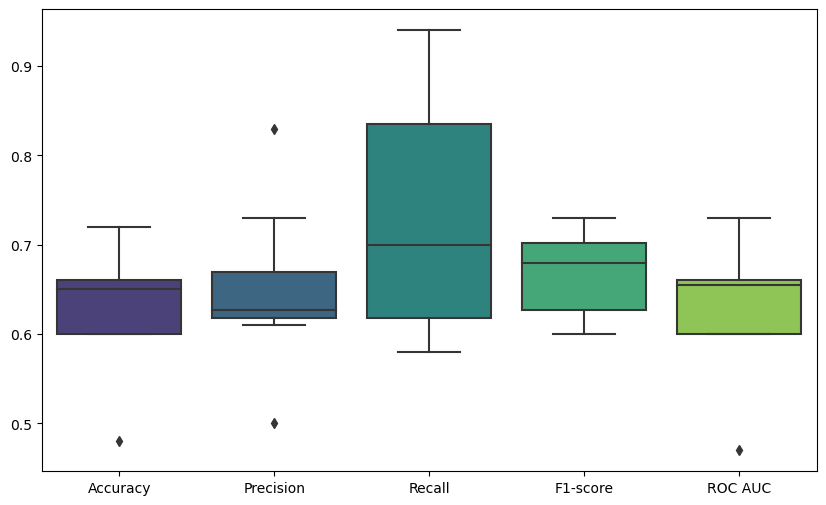

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.T, palette='viridis')
plt.show()

### Heatmap

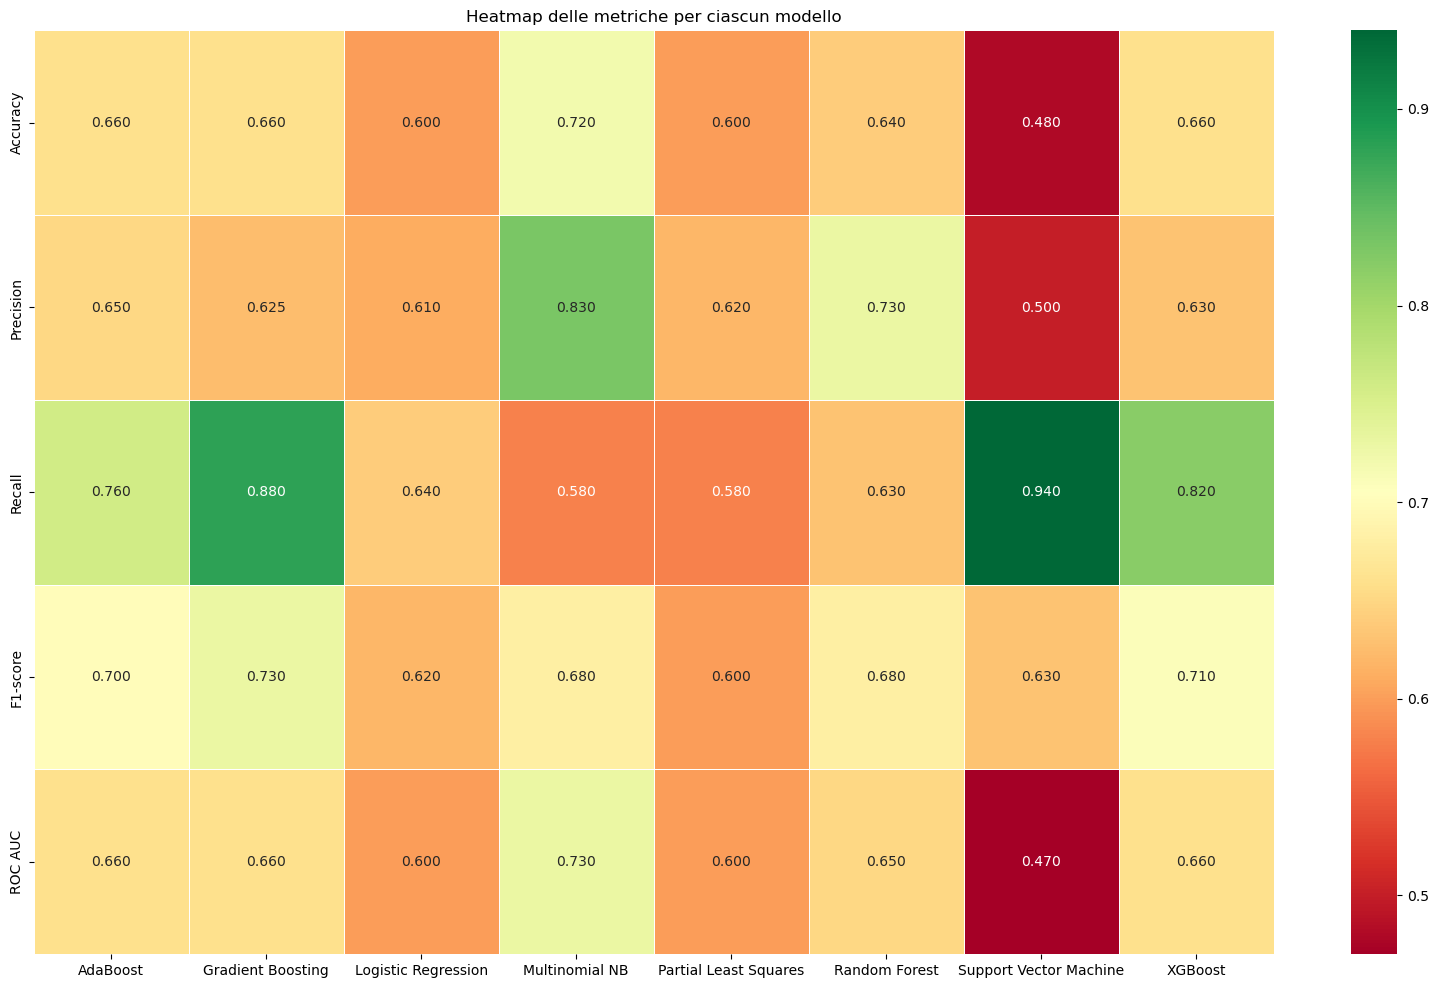

In [24]:
plt.figure(figsize=(20, 12))

sns.heatmap(df, annot=True, cmap='RdYlGn', fmt=".3f", linewidths=.5)
plt.title('Heatmap delle metriche per ciascun modello')
plt.show()